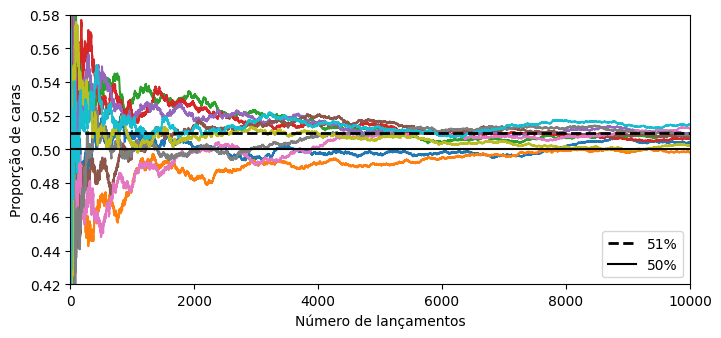

In [1]:
# Aprendizado Ensemble e Florestas Aleatórias
# Classificadores de Votação
# Analogia da moeda
# 1. Cara: 1 (51%)
# 2. Coroa: 0 (49%)

import numpy as np
import matplotlib.pyplot as plt

heads_proba = 0.51
coin_tosses = (np.random.rand(10000, 10) < heads_proba).astype(np.int32)
cumulative_heads_ratio = np.cumsum(coin_tosses, axis=0) / np.arange(1, 10001).reshape(-1, 1)

plt.figure(figsize=(8,3.5))
plt.plot(cumulative_heads_ratio)
plt.plot([0, 10000], [0.51, 0.51], "k--", linewidth=2, label="51%")
plt.plot([0, 10000], [0.5, 0.5], "k-", label="50%")
plt.xlabel("Número de lançamentos")
plt.ylabel("Proporção de caras")
plt.legend(loc="lower right")
plt.axis([0, 10000, 0.42, 0.58])
plt.show()


In [ ]:
# Conforme o número de lançamentos aumenta, a proporção de caras se aproxima de 51%.


In [28]:
# Classificadores de Votação

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [29]:
# Analisando a acurácia de cada classificador e do classificador de votação
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.888
SVC 0.896
VotingClassifier 0.904


In [23]:
make_moons = make_moons(n_samples=100, random_state=42)


In [31]:
# soft voting

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

# Analisando a acurácia de cada classificador e do classificador de votação
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_test, y_pred))
    


LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.92


In [32]:
# Bagging e Pasting

# Bagging e Pasting em Scikit-Learn
# Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)



0.856


0.904


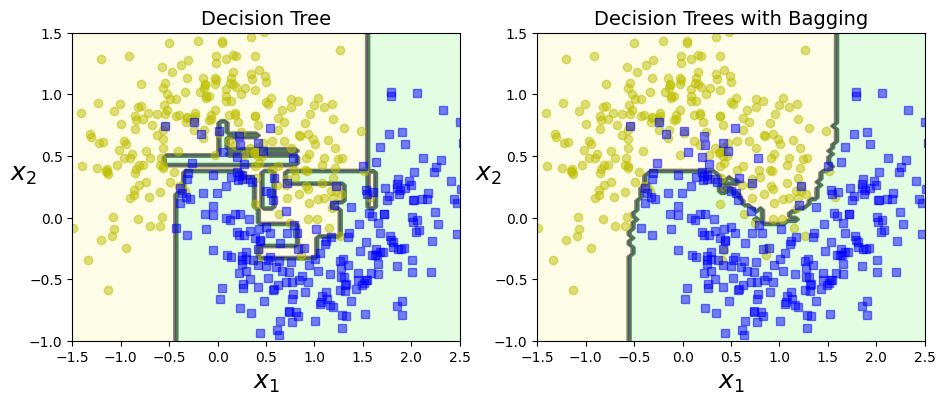

In [34]:
# Comparando o Decision Tree com o Bagging e sem Bagging
tree_clf = DecisionTreeClassifier(random_state=42)

tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print(accuracy_score(y_test, y_pred))


from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.show()


In [ ]:
# Na esquerda, temos um único Decision Tree, e na direita, temos um conjunto de 500 árvores, todas treinadas com Bagging.
# Note que o conjunto de árvores tem uma fronteira de decisão muito mais regular: esta é uma fronteira de decisão 
# que se assemelha muito mais com a intuição que temos sobre a fronteira de decisão ideal para este conjunto de dados.



In [35]:
# out-of-bag é um método de validação cruzada que permite avaliar a qualidade do modelo sem a necessidade de um conjunto de validação.


bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_


0.9013333333333333

In [36]:
# O resultado é de 90.1%, próximo do resultado obtido no conjunto de teste.
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)


0.912

In [37]:
# O método oob_decision_function_ retorna a probabilidade de cada instância para cada classe.
bag_clf.oob_decision_function_

array([[0.39673913, 0.60326087],
       [0.35359116, 0.64640884],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.08333333, 0.91666667],
       [0.32596685, 0.67403315],
       [0.        , 1.        ],
       [0.98795181, 0.01204819],
       [0.9947644 , 0.0052356 ],
       [0.82608696, 0.17391304],
       [0.        , 1.        ],
       [0.78461538, 0.21538462],
       [0.84831461, 0.15168539],
       [0.97883598, 0.02116402],
       [0.04848485, 0.95151515],
       [0.        , 1.        ],
       [0.98170732, 0.01829268],
       [0.93513514, 0.06486486],
       [0.99453552, 0.00546448],
       [0.03314917, 0.96685083],
       [0.33673469, 0.66326531],
       [0.91052632, 0.08947368],
       [1.        , 0.        ],
       [0.96938776, 0.03061224],
       [0.        , 1.        ],
       [0.99441341, 0.00558659],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.68208092, 0.31791908],
       [0.